# Importing the required libraries

In [ ]:
!pip install tensorflow --upgrade

In [1]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# Load data

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

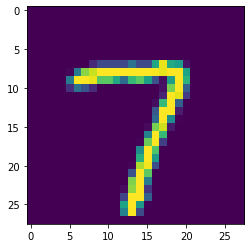

In [5]:
plt.imshow(x_train[5100])     #ploting the index=image

In [6]:
np.argmax(y_train[5100])

0

# Reshaping Dataset

In [7]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [8]:
number_of_classes = 10  #storing the no of classes in a variable

In [9]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [10]:
#create model
model=Sequential ()

In [11]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [12]:
#flatten the dimension of the image
model.add(Flatten())

In [13]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [14]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [15]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [16]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 179s 95ms/step - loss: 0.1954 - accuracy: 0.9528 - val_loss: 0.1004 - val_accuracy: 0.9699
Epoch 2/5
1875/1875 [==============================] - 175s 93ms/step - loss: 0.0662 - accuracy: 0.9795 - val_loss: 0.0841 - val_accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.0863 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 177s 94ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0990 - val_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 175s 93ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0969 - val_accuracy: 0.9784


# Observing the metrics

In [22]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.0968763530254364, 0.9783999919891357]


# Test The Model

In [23]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 98ms/step
[[9.49241702e-15 1.10002903e-18 1.06311624e-07 7.07821243e-07
  3.26013513e-04 1.23367059e-07 6.36778025e-15 1.81167312e-08
  7.35929507e-06 9.99665618e-01]]


In [25]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [26]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [32]:
# Save the model
model.save('models/mnistCNN.h5')

In [33]:
from tensorflow.keras.models import load_model
model=load_model("models/mnistCNN.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [19]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [20]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


In [35]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Cloud deploy

In [34]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.1 MB/s 
     |████████████████████████████████| 51 kB 878 kB/s 
     |████████████████████████████████| 824 kB 53.5 MB/s 
     |████████████████████████████████| 133 kB 50.9 MB/s 
     |████████████████████████████████| 547 kB 52.2 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=49216b846604da9415631f680695ea7fa3113872d664a81276a60d31da8dae7c
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=3d7d62d34c51e39222074404170d913a45718b47a61585d9ee66460bf70023d6
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [36]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"Qxwy3byu83al_Lvmk05S2xcRhHqeQiy_4BxWzPcxuB9A"
}
client = APIClient(credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [37]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/14d571ceb9ec45fe98e6eac22b1fe65f:a2858581-aa42-498f-8101-3cb5eeb52609::',
      'guid': 'a2858581-aa42-498f-8101-3cb5eeb52609',
      'name': 'Watson Machine Learning-vu',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'hdr',
    'scope': {'bss_account_id': '14d571ceb9ec45fe98e6eac22b1fe65f'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '98aa0e16-84dc-4ca5-af32-24752ee67208',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '4c745639eeba4adb8d2f56fd2b57f351',
        'api_key': 'T16lCcwdvCpz4BUdQtm0QnMRtUmxyj_w78zt6doIpCx8',
        'secret_access_key': 'dde37ce0ae17d50ee939028eda9f9c44d20b54bcc2f9f67c',
        'service_id': 'ServiceId-8758d9a8-8ee7-40b6-a087-94e890958f1f'},
       'editor': {'access_key_id': '39926bf2c3864cf1812a88a8c661777b',
        'api_key': '6zyoE

In [38]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [39]:
space_uid = guid_from_space_name(client,'hdr')
print("Space UID = " + space_uid)

Space UID = ad4acd34-c854-43ef-8fa2-0e31b3b4a474


In [40]:
client.set.default_space(space_uid)

'SUCCESS'

In [41]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [42]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [43]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [44]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T09:57:56.684Z',
  'id': 'a0bf67e7-cc68-4d67-a1d8-e9b304c3923f',
  'modified_at': '2022-11-18T09:58:00.115Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-667000BZM2',
  'resource_key': '42a60315-37ff-4b45-b603-8fc3bc76f564',
  'space_id': 'ad4acd34-c854-43ef-8fa2-0e31b3b4a474'},
 'system': {'warnings': []}}

In [45]:
model_id = client.repository.get_model_id(model_details)
model_id

'a0bf67e7-cc68-4d67-a1d8-e9b304c3923f'

In [46]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/content/models/DigitRecog_IBM_model.tar.gz'